# EDA Data Science

Importar librerias 

In [11]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
from sqlalchemy import create_engine, Column, column, Integer, Float, String, Text, Boolean, Date, DateTime, Time, MetaData, Table, text, insert, select
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import find_dotenv , load_dotenv

Configurar conexion a base de datos

In [12]:
dotenv_patch=find_dotenv()

load_dotenv(dotenv_patch)

# Obtén los valores de las variables de entorno
username = os.getenv('DB_USERNAME')
password = os.getenv('DB_PASSWORD')
host = os.getenv('DB_HOST')
port = os.getenv('DB_PORT')
database = os.getenv('DB_DATABASE')

In [13]:
#Creo el engine para conectarme
db_url = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(db_url)

In [14]:
df = pd.read_sql('historico', engine)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket
0,2018-01-02,40.175166,40.680425,39.962672,40.670979,102223600,0.0,0.0,AAPL
1,2018-01-03,40.734718,41.211646,40.600142,40.663887,118071600,0.0,0.0,AAPL
2,2018-01-04,40.737080,40.956657,40.628475,40.852772,89738400,0.0,0.0,AAPL
3,2018-01-05,40.949575,41.405251,40.857495,41.317894,94640000,0.0,0.0,AAPL
4,2018-01-08,41.164433,41.461920,41.065266,41.164433,82271200,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...
29770,2024-02-26,373.510010,374.880005,370.720001,371.600006,2361345,0.0,0.0,HD
29771,2024-02-26,58.930000,60.174999,58.724998,59.330002,11010910,0.0,0.0,PYPL
29772,2024-02-26,183.750000,184.460007,182.479996,183.360001,7058406,0.0,0.0,JPM
29773,2024-02-26,528.320007,532.809998,524.309998,525.320007,2275206,0.0,0.0,UNH


In [15]:
#cerramos conexion una vez obtenidos los datos
engine.dispose()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29775 entries, 0 to 29774
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          29775 non-null  datetime64[ns]
 1   Open          29775 non-null  float64       
 2   High          29775 non-null  float64       
 3   Low           29775 non-null  float64       
 4   Close         29775 non-null  float64       
 5   Volume        29775 non-null  int64         
 6   Dividends     29775 non-null  float64       
 7   Stock Splits  29775 non-null  float64       
 8   Ticket        29775 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 2.0+ MB


Vamos a agregar algunas columnas y hacer unos calculos simples

In [17]:
acciones = df['Ticket'].unique()

In [18]:
df['Rendimiento_diario'] = df['Close'] - df['Open']


In [19]:
#calcular cambio porcentual diario
df['Cambio_porcentual_diario'] = ((df['Close'] - df['Open']) / df['Open']) * 100


creamos columnas con mes y fecha por si hay periodos estacionarios

In [20]:
df['Dia_semana'] = df['Date'].dt.dayofweek
df['Mes'] = df['Date'].dt.month


In [21]:
#Amplitud diaria
df['Amplitud_diaria'] = df['High'] - df['Low']


In [22]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket,Rendimiento_diario,Cambio_porcentual_diario,Dia_semana,Mes,Amplitud_diaria
0,2018-01-02,40.175166,40.680425,39.962672,40.670979,102223600,0.0,0.0,AAPL,0.495813,1.234127,1,1,0.717753
1,2018-01-03,40.734718,41.211646,40.600142,40.663887,118071600,0.0,0.0,AAPL,-0.070831,-0.173885,2,1,0.611504
2,2018-01-04,40.737080,40.956657,40.628475,40.852772,89738400,0.0,0.0,AAPL,0.115691,0.283995,3,1,0.328182
3,2018-01-05,40.949575,41.405251,40.857495,41.317894,94640000,0.0,0.0,AAPL,0.368319,0.899445,4,1,0.547755
4,2018-01-08,41.164433,41.461920,41.065266,41.164433,82271200,0.0,0.0,AAPL,0.000000,0.000000,0,1,0.396654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29770,2024-02-26,373.510010,374.880005,370.720001,371.600006,2361345,0.0,0.0,HD,-1.910004,-0.511366,0,2,4.160004
29771,2024-02-26,58.930000,60.174999,58.724998,59.330002,11010910,0.0,0.0,PYPL,0.400002,0.678774,0,2,1.450001
29772,2024-02-26,183.750000,184.460007,182.479996,183.360001,7058406,0.0,0.0,JPM,-0.389999,-0.212245,0,2,1.980011
29773,2024-02-26,528.320007,532.809998,524.309998,525.320007,2275206,0.0,0.0,UNH,-3.000000,-0.567838,0,2,8.500000


Vamos a realizar algunos graficos para ver si se ve algunas patrones

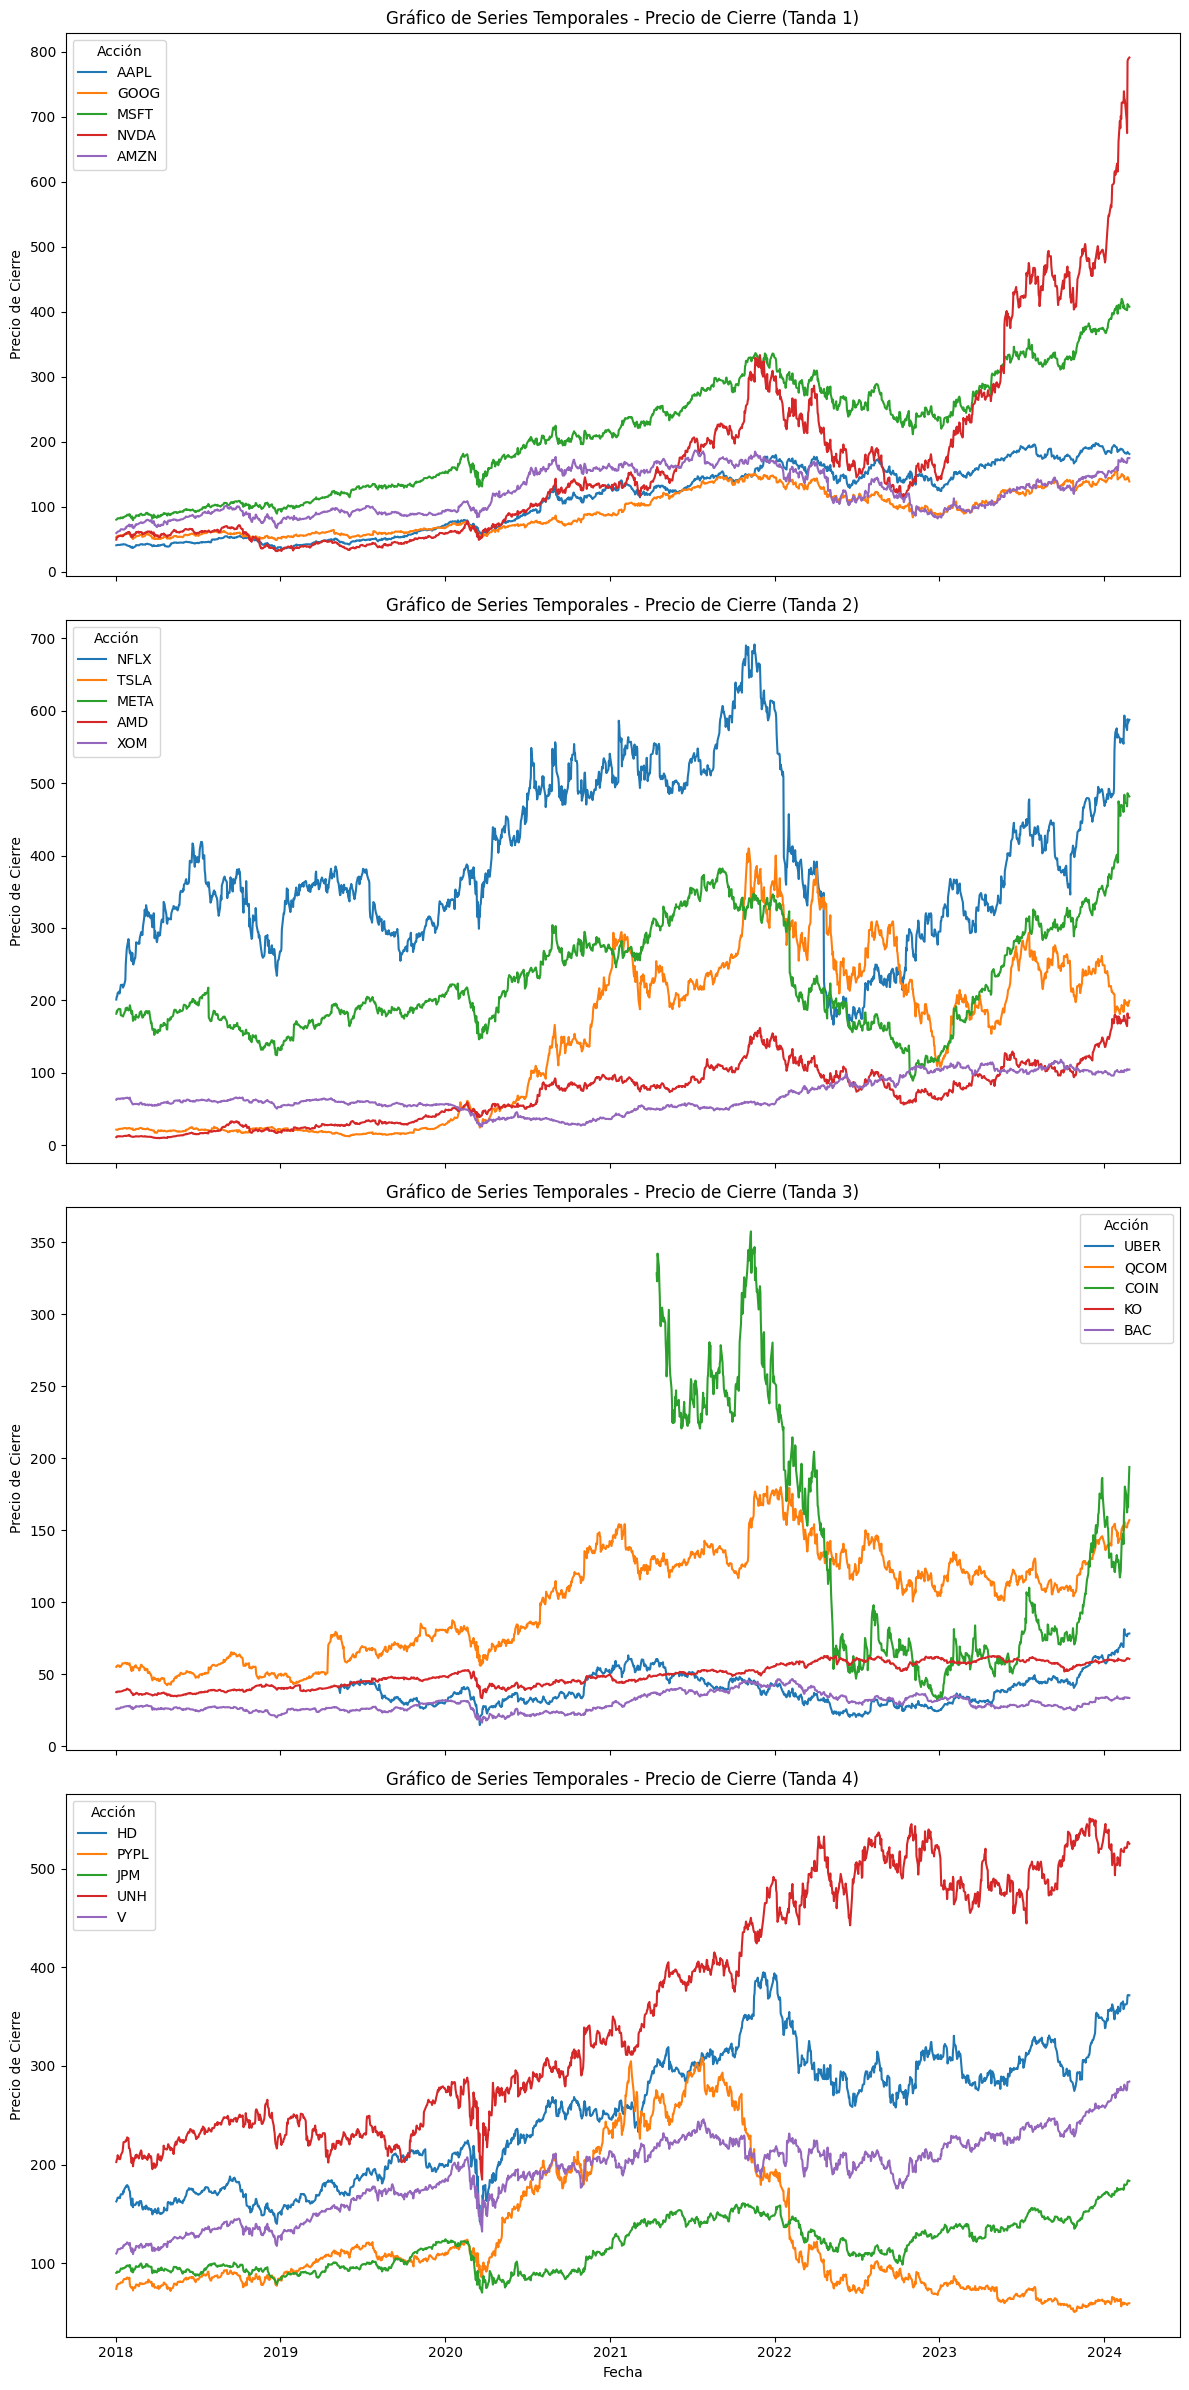

In [23]:
acciones_por_tanda = 5
num_tandas = (len(df['Ticket'].unique()) - 1) // acciones_por_tanda + 1

# Crear subgráficos
fig, axes = plt.subplots(num_tandas, 1, figsize=(12, num_tandas * 6), sharex=True)

# Generar gráficos para cada tanda de 5 acciones
for i, ax in enumerate(axes):
    subset_df = df[df['Ticket'].isin(list(df['Ticket'].unique())[i * acciones_por_tanda:(i + 1) * acciones_por_tanda])]
    sns.lineplot(x='Date', y='Close', hue='Ticket', data=subset_df, palette='tab10', ax=ax)
    ax.set_title(f'Gráfico de Series Temporales - Precio de Cierre (Tanda {i + 1})')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio de Cierre')
    ax.legend(title='Acción')

plt.tight_layout()
plt.show()

Se realizo el historico de precios para ver si habia patrones de tiempo pero note que algunas acciones por el boom del momento de la IA le peromitio un alza en su valor


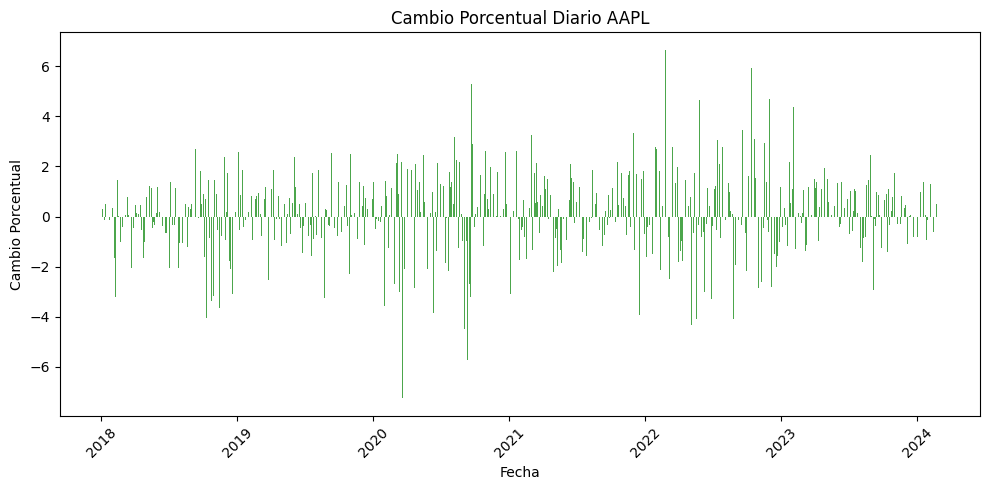

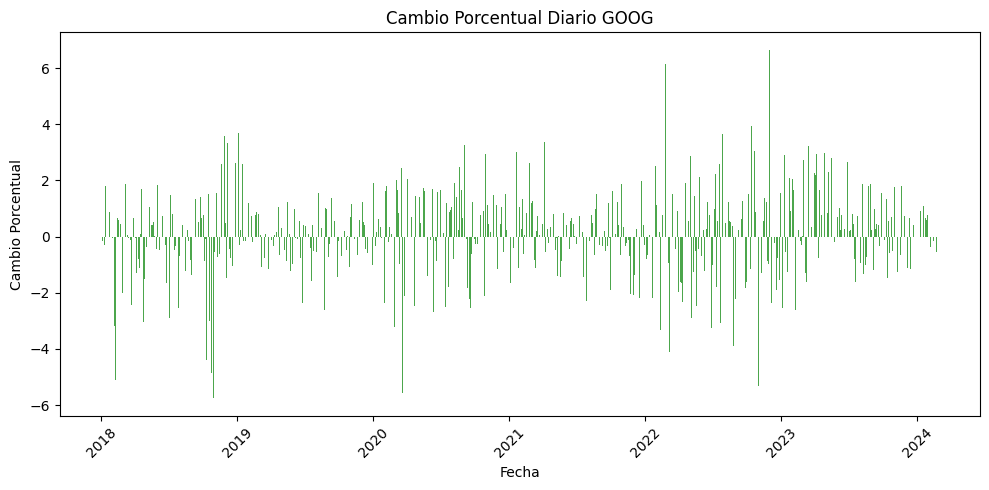

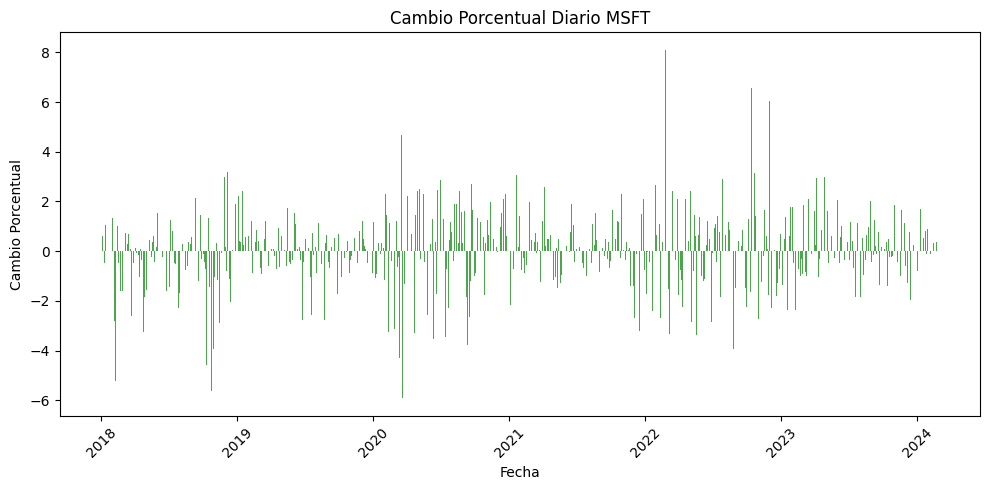

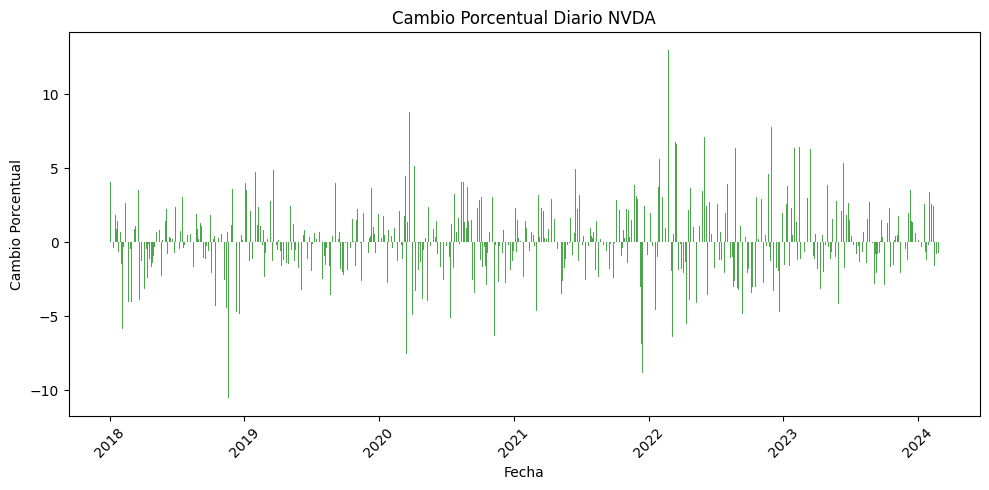

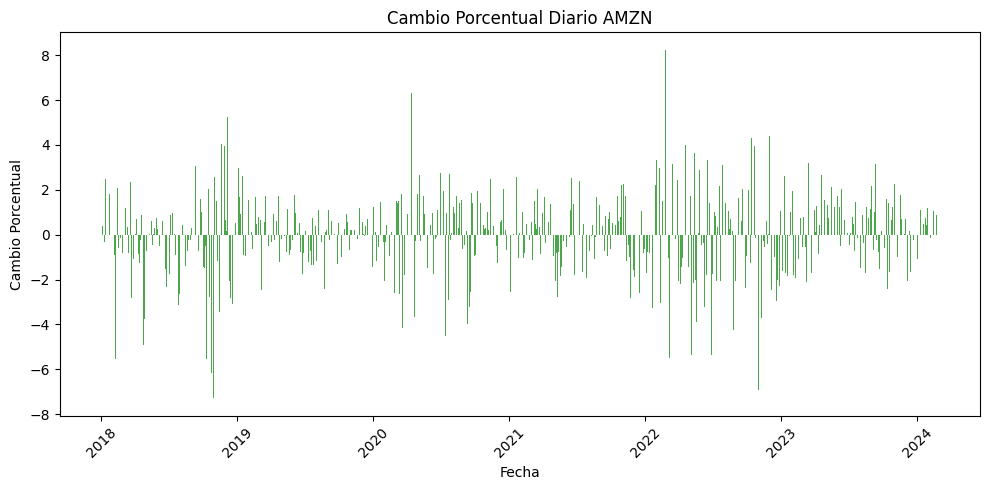

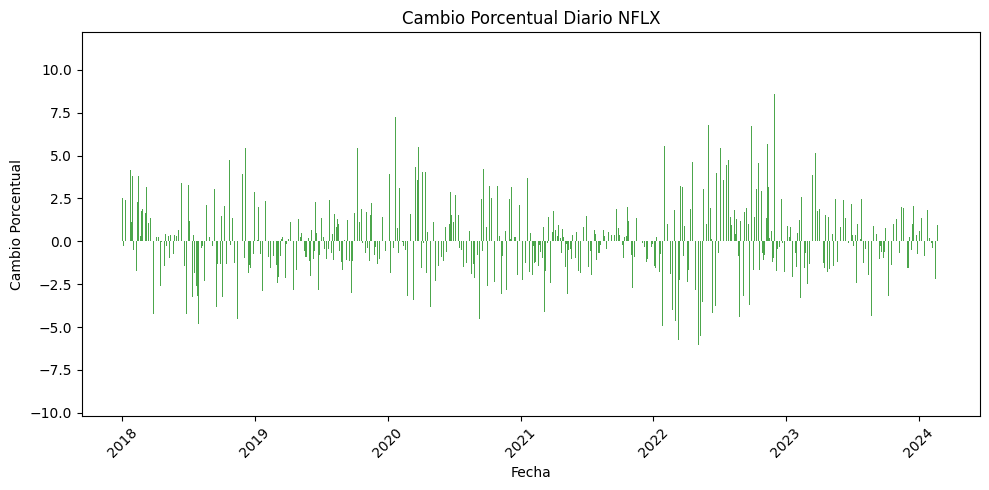

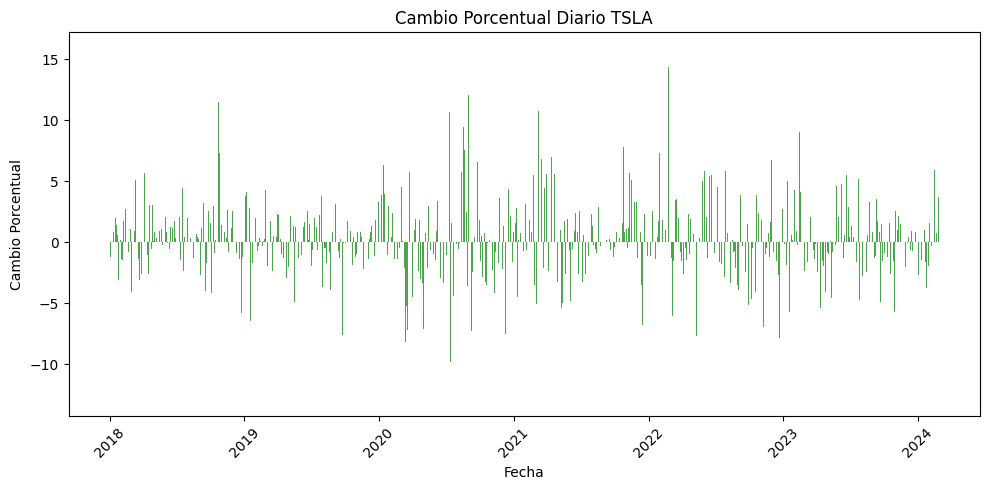

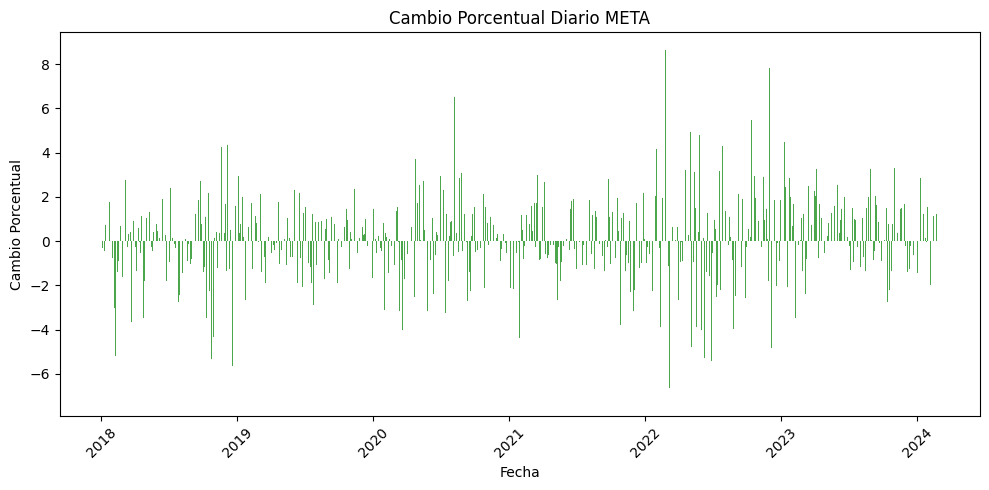

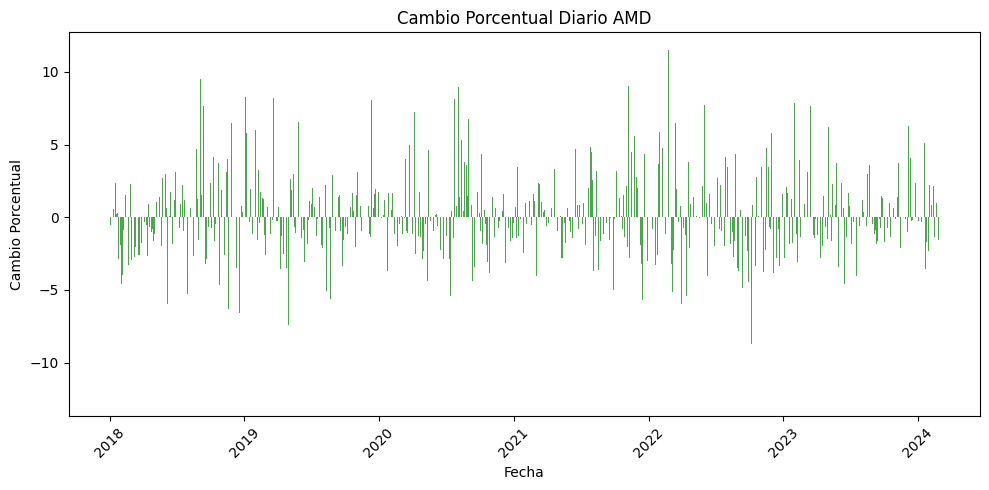

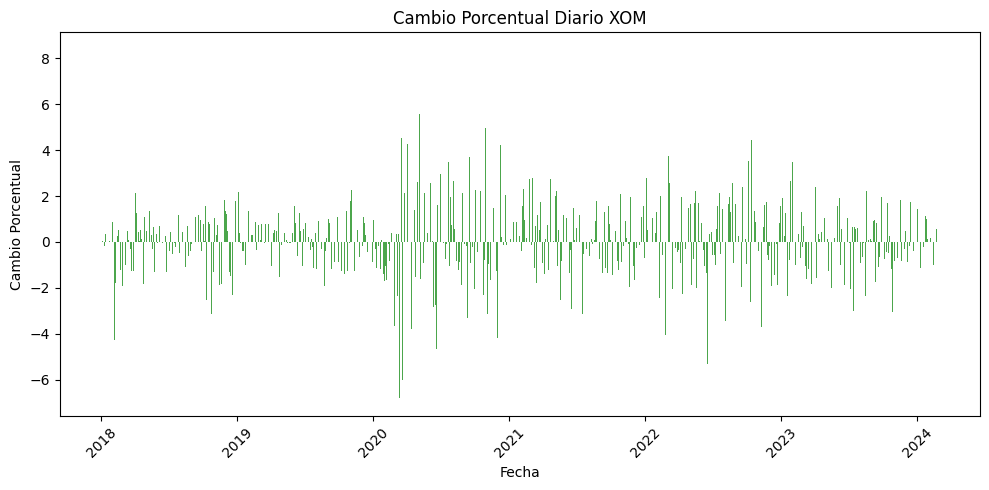

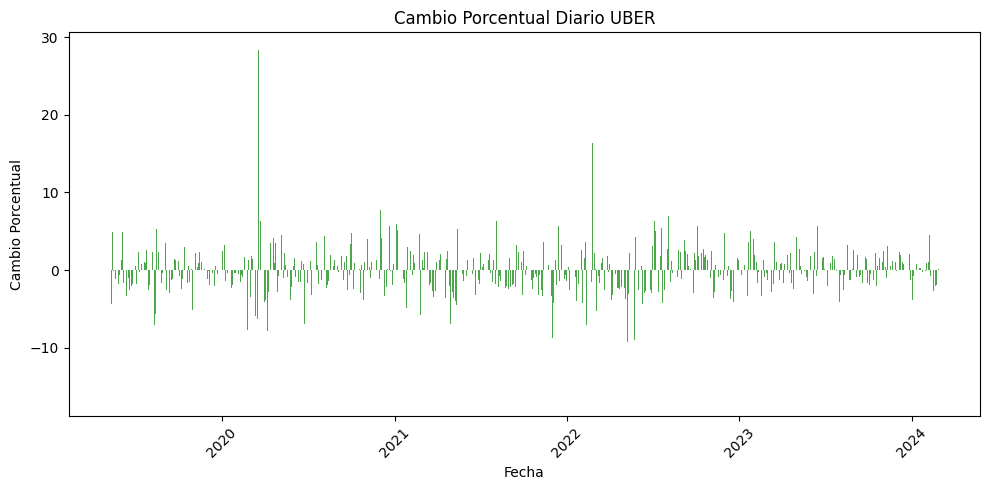

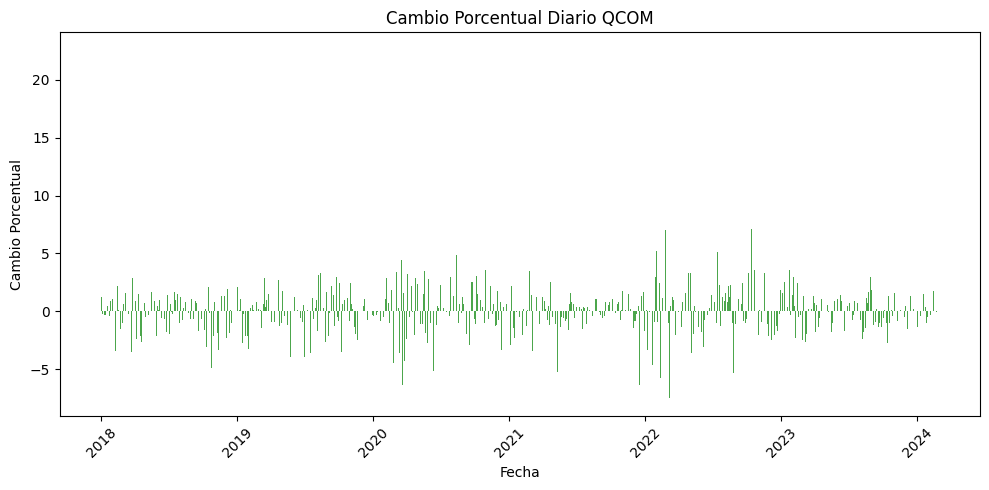

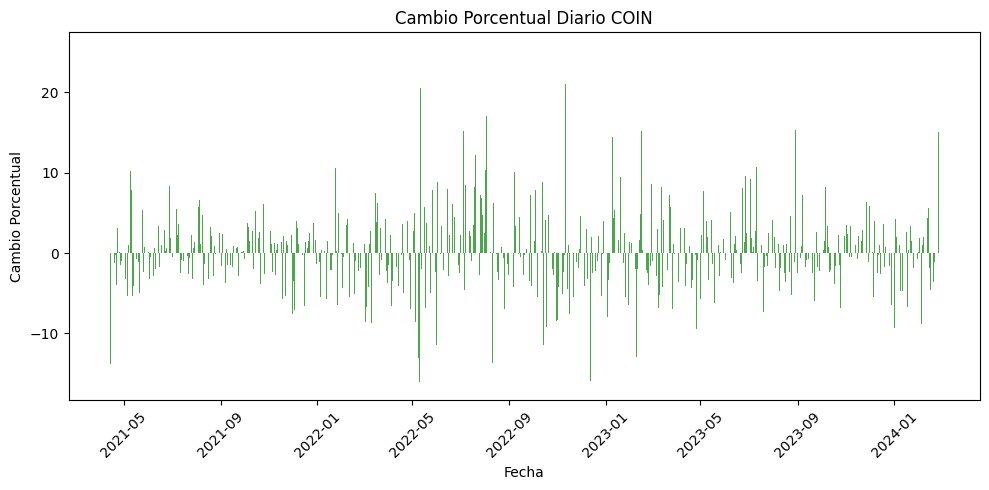

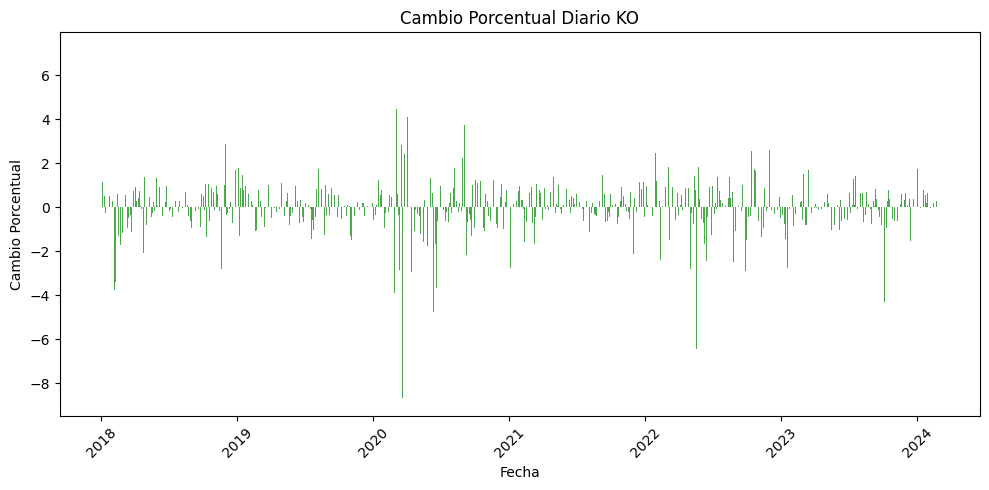

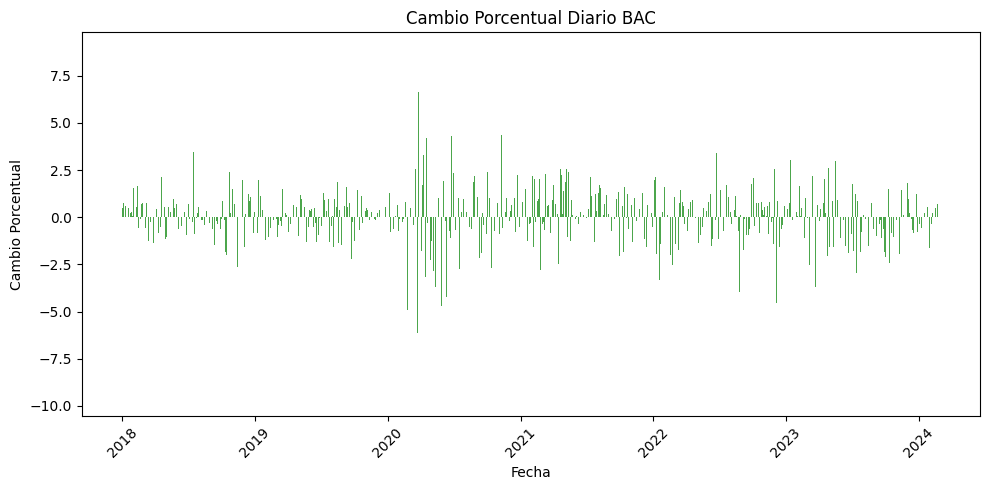

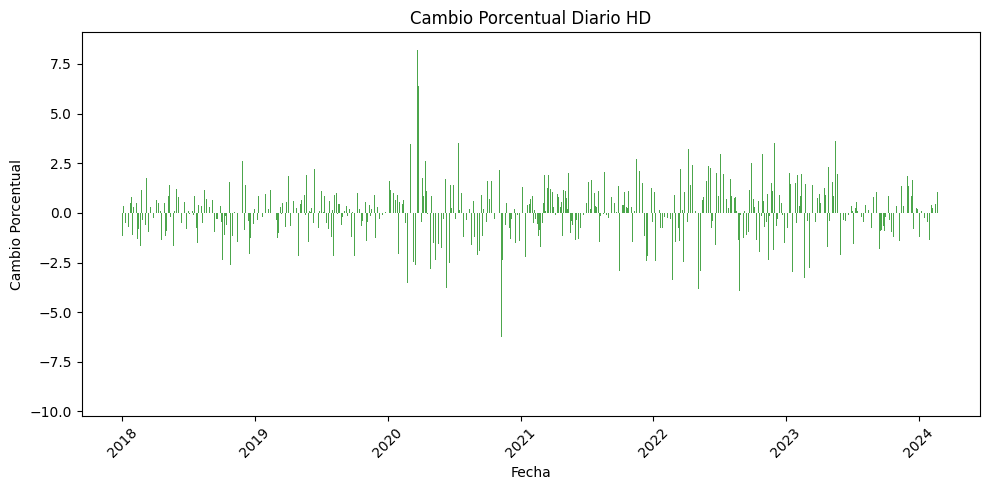

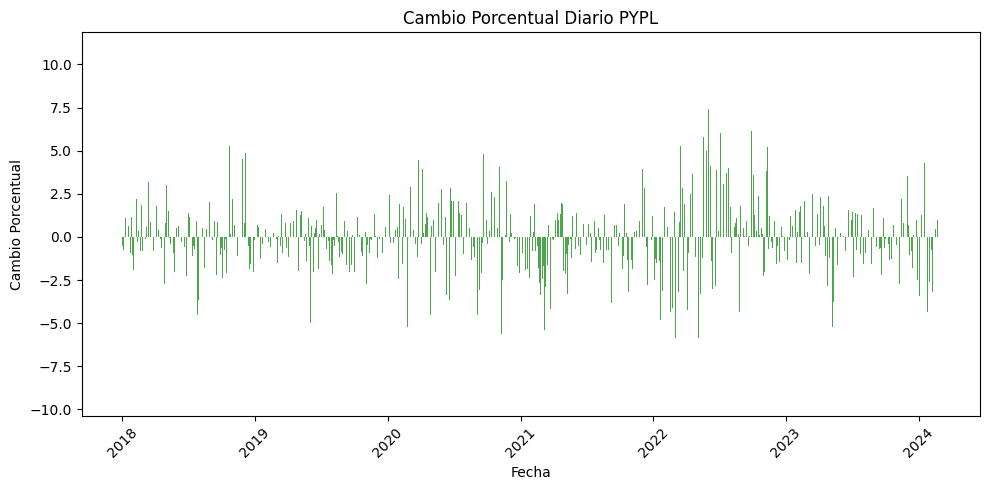

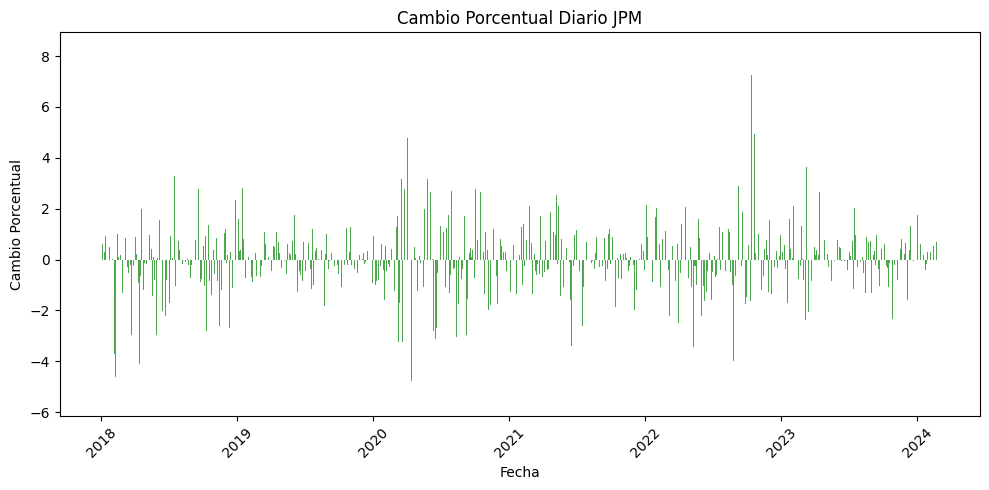

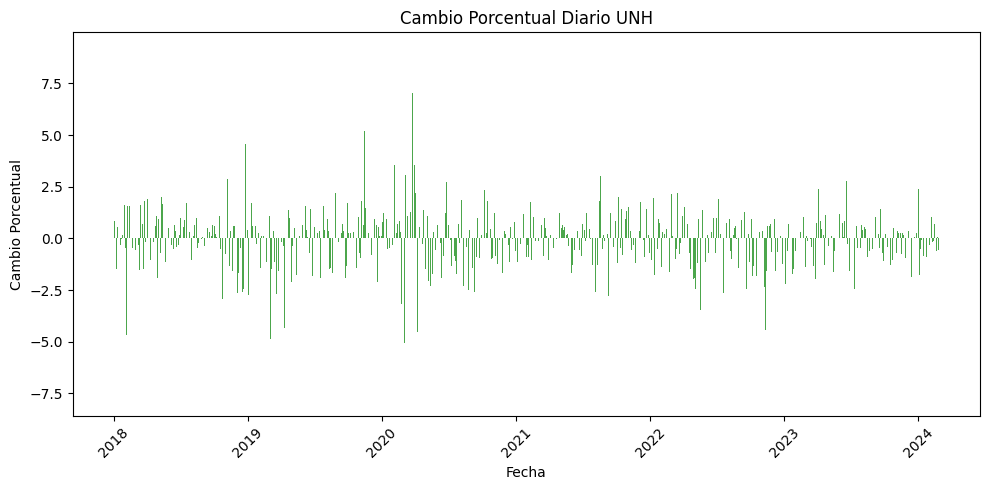

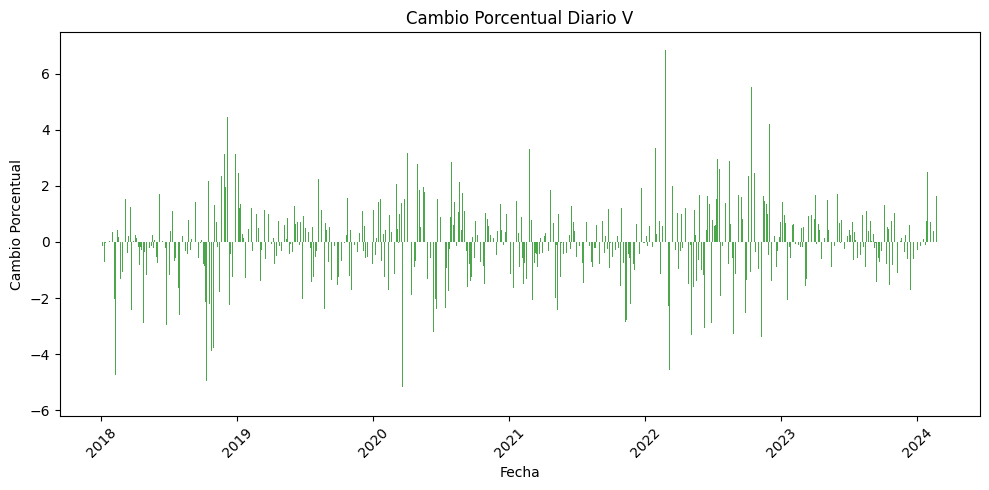

In [24]:
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    plt.figure(figsize=(10, 5))

    # Gráfico de Barras
    plt.bar(df_accion['Date'], df_accion['Cambio_porcentual_diario'], color='green', alpha=0.7)

    # O Gráfico de Línea
    # plt.plot(df['Fecha'], df['Cambio_porcentual_diario'], marker='o', linestyle='-', color='green')

    plt.title(f'Cambio Porcentual Diario {accion}')
    plt.xlabel('Fecha')
    plt.ylabel('Cambio Porcentual')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

En muchas acciones su cambio porcentual diario se mantiene muy en equilobrio despues de un pico alto los siguentes dias tendran variaciones muy pequeñas en positivo y muy grandes en negativo tambien puede ser dado por el momento de ventas de las acciones por parte de los accionistas

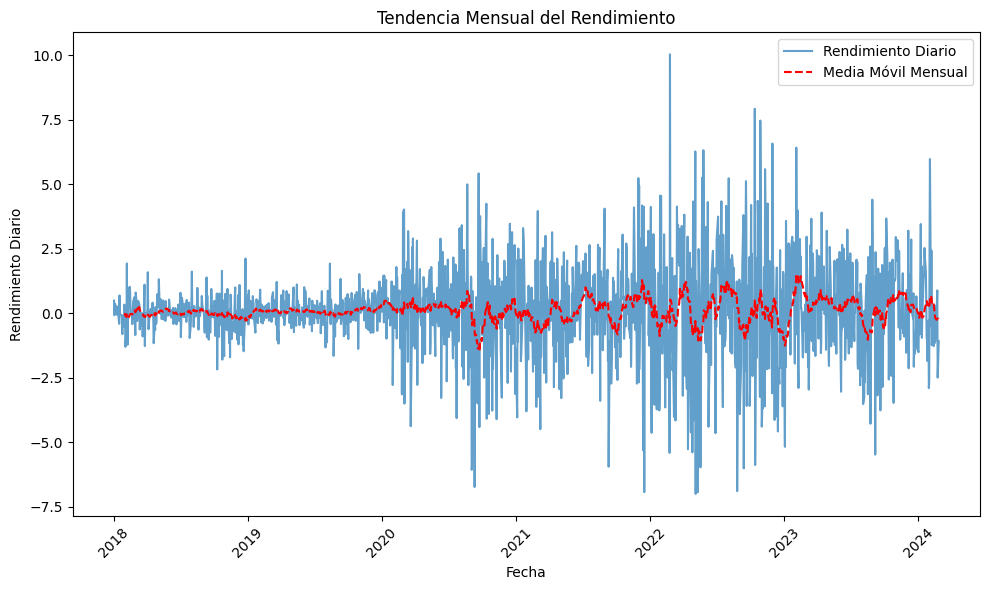

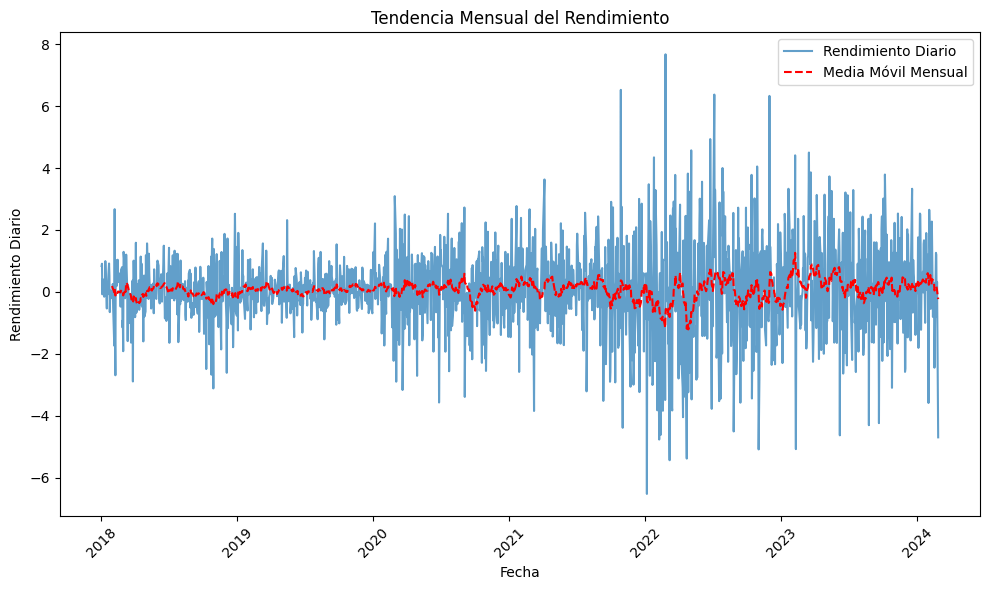

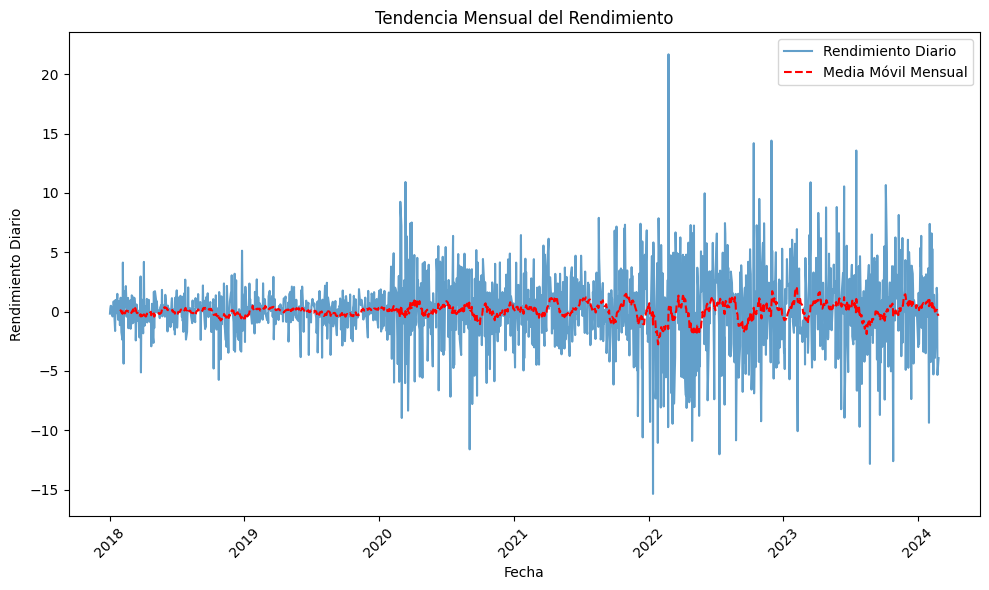

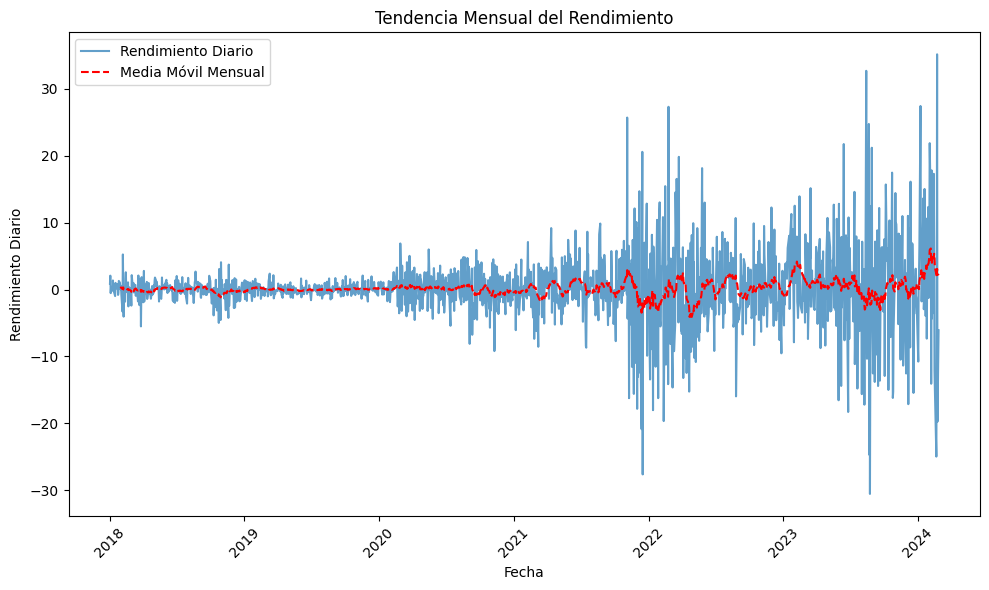

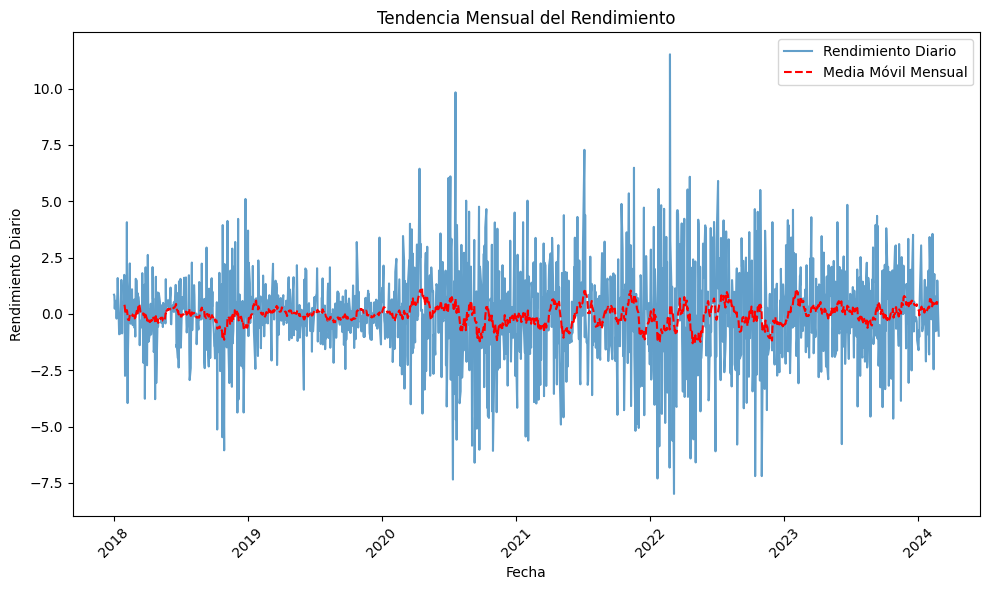

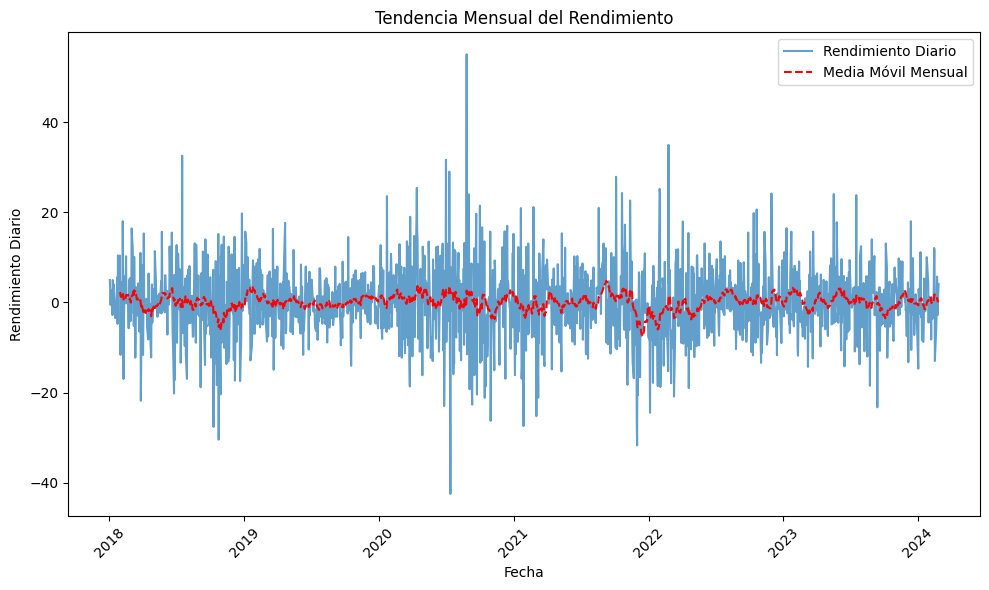

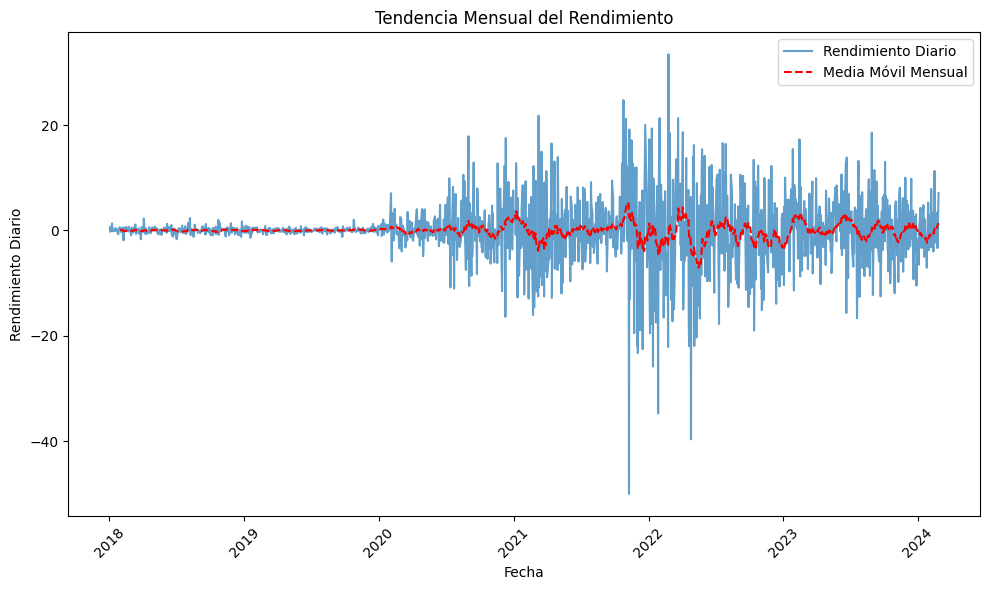

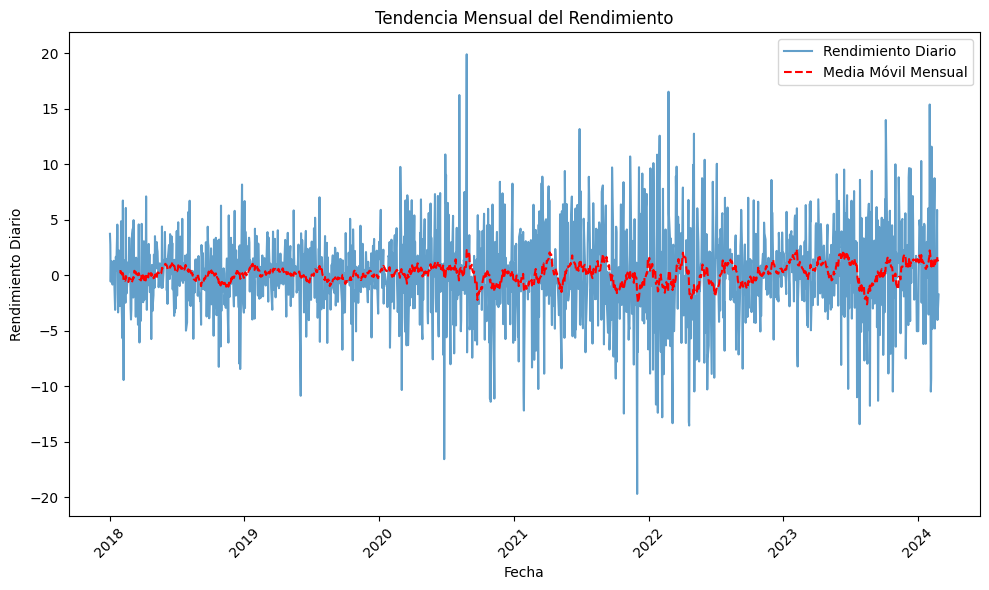

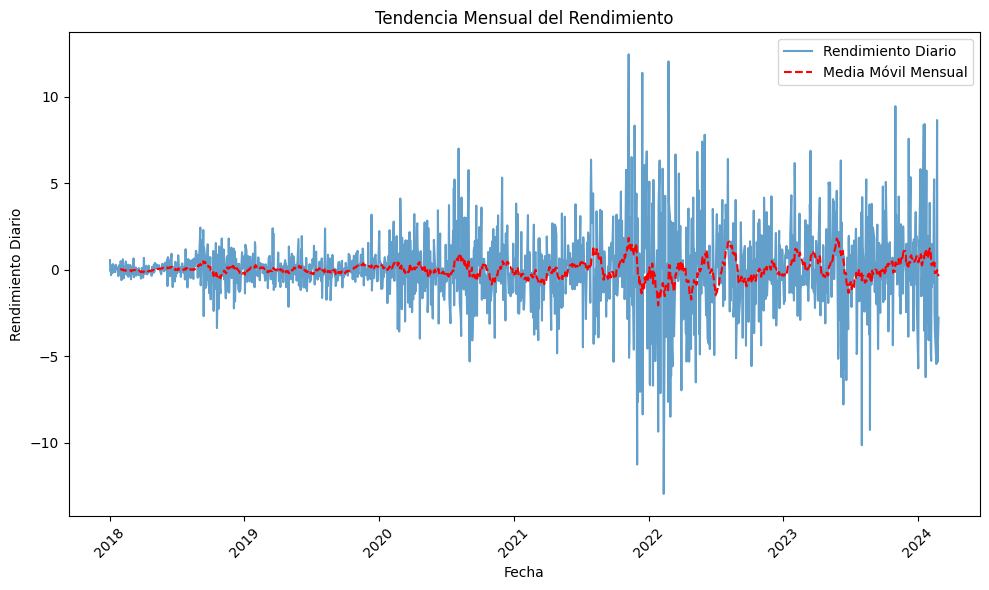

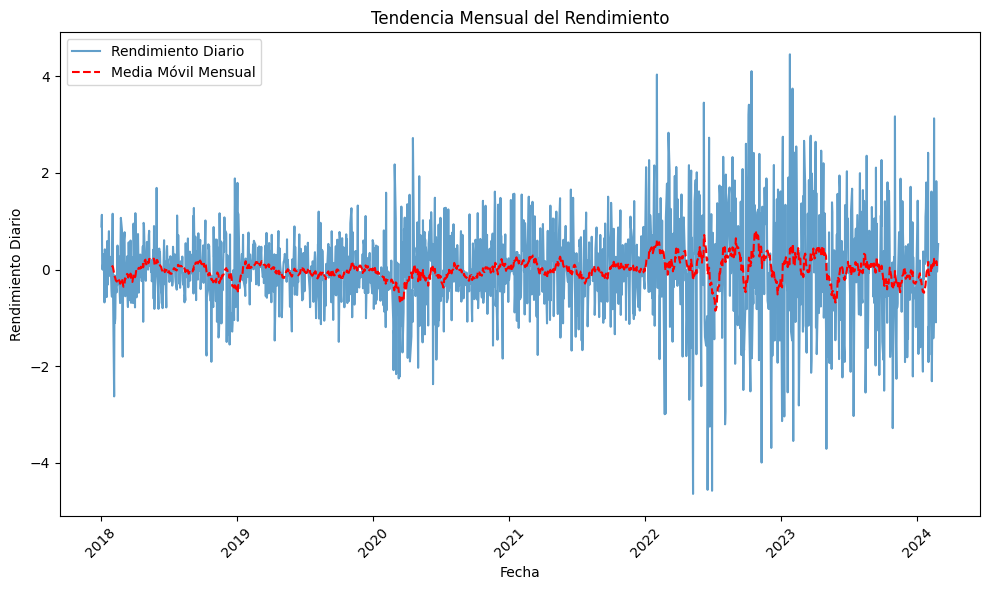

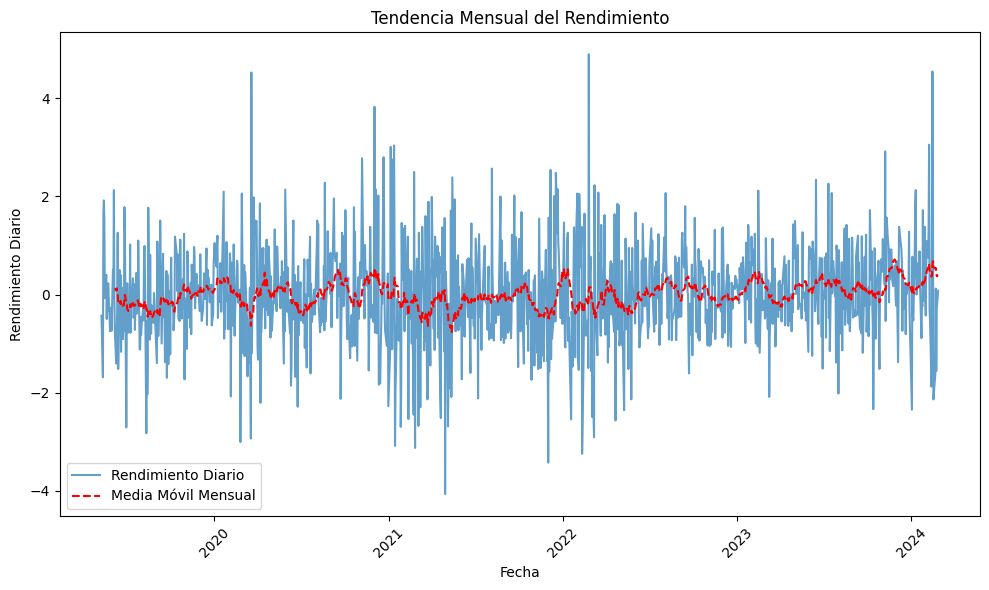

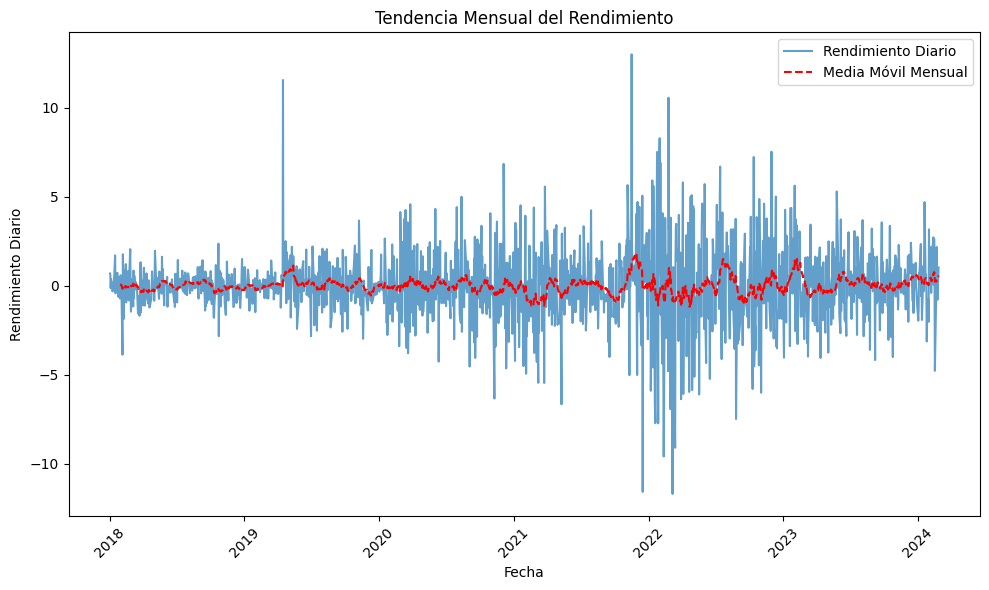

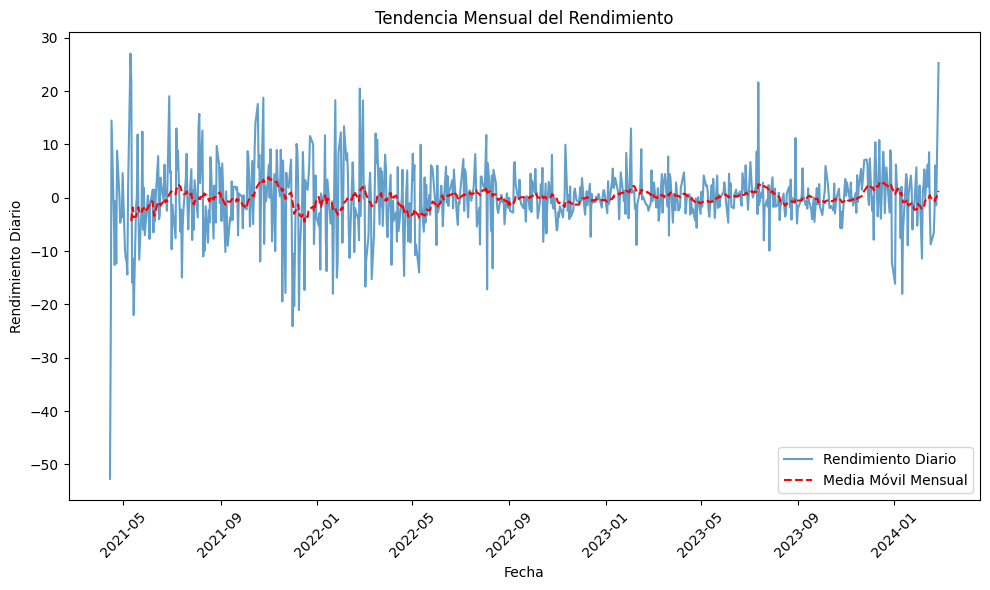

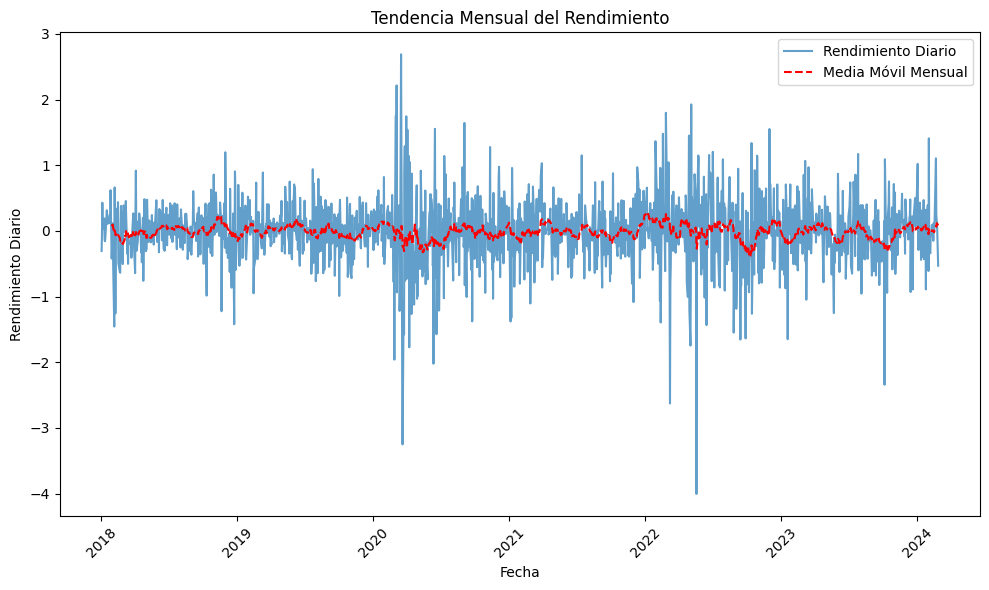

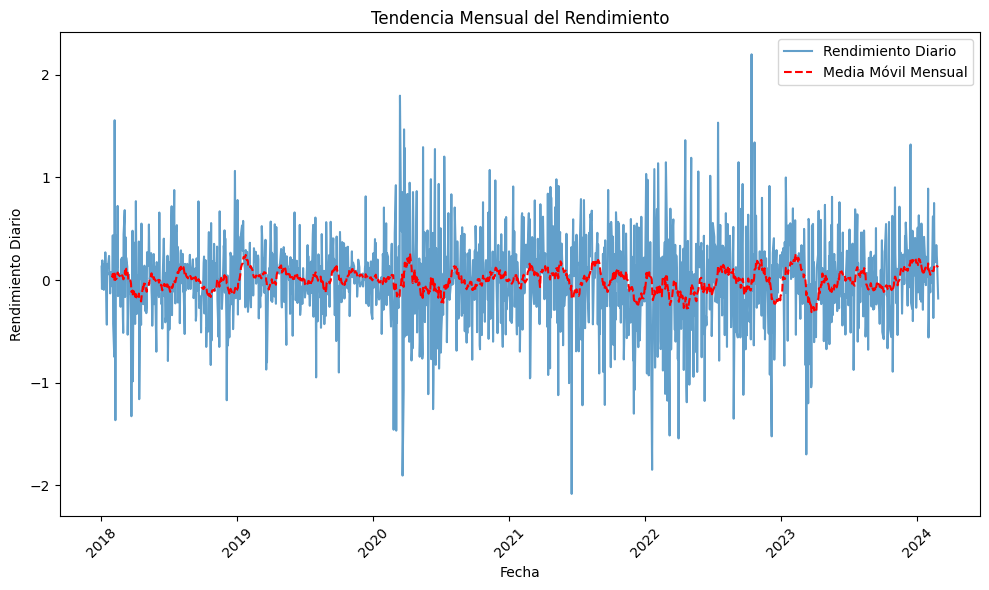

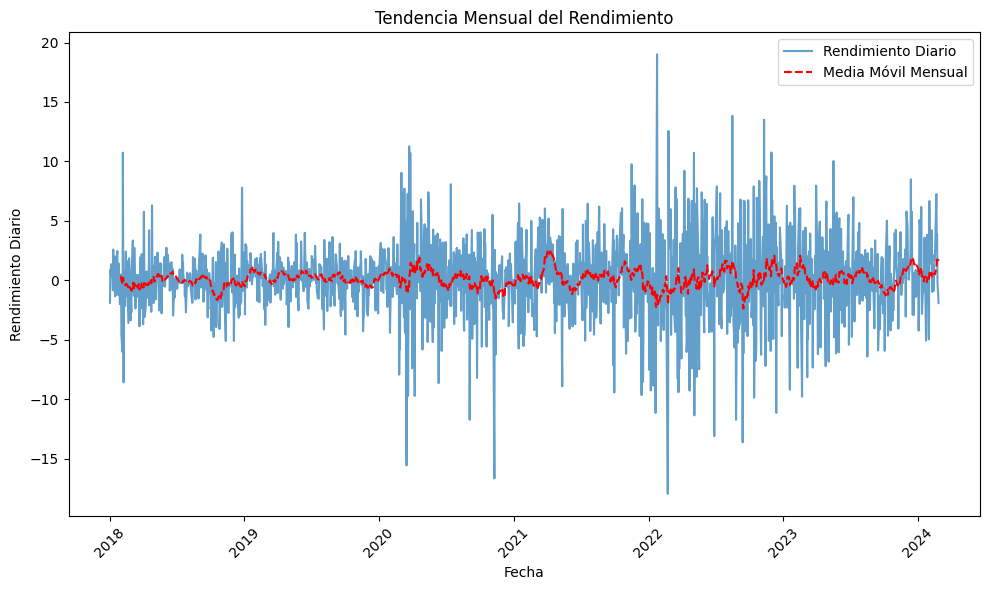

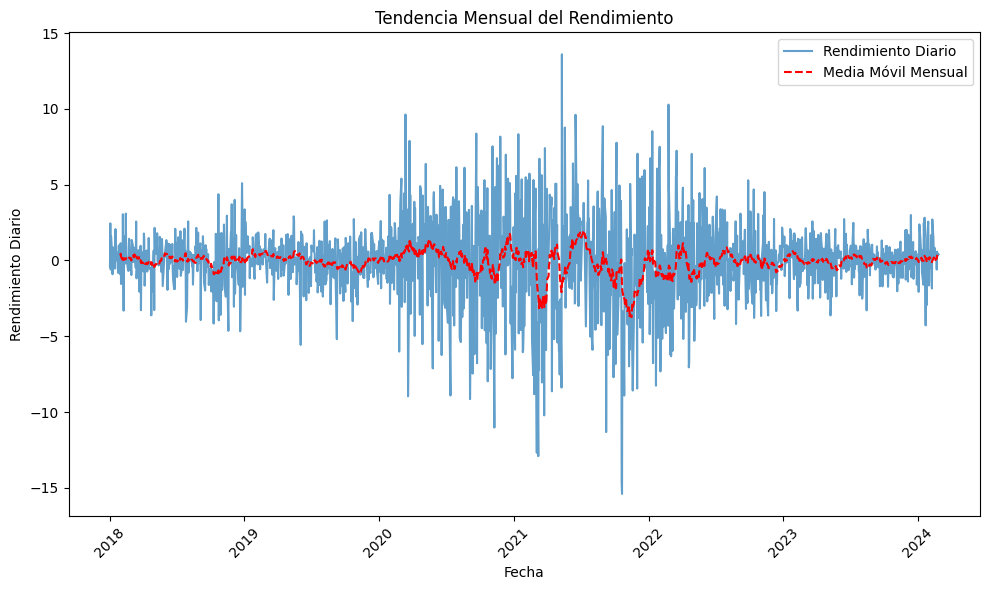

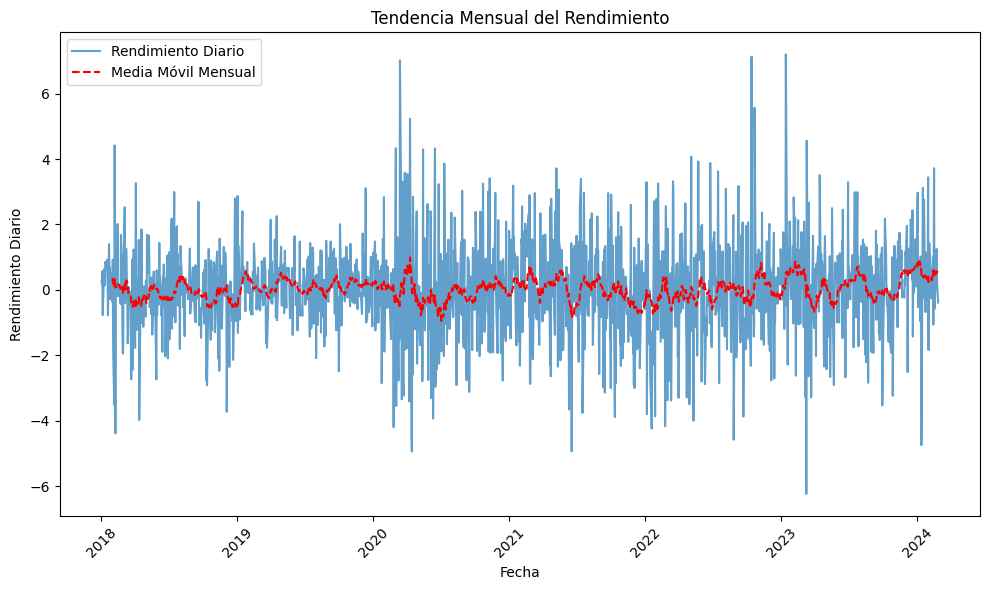

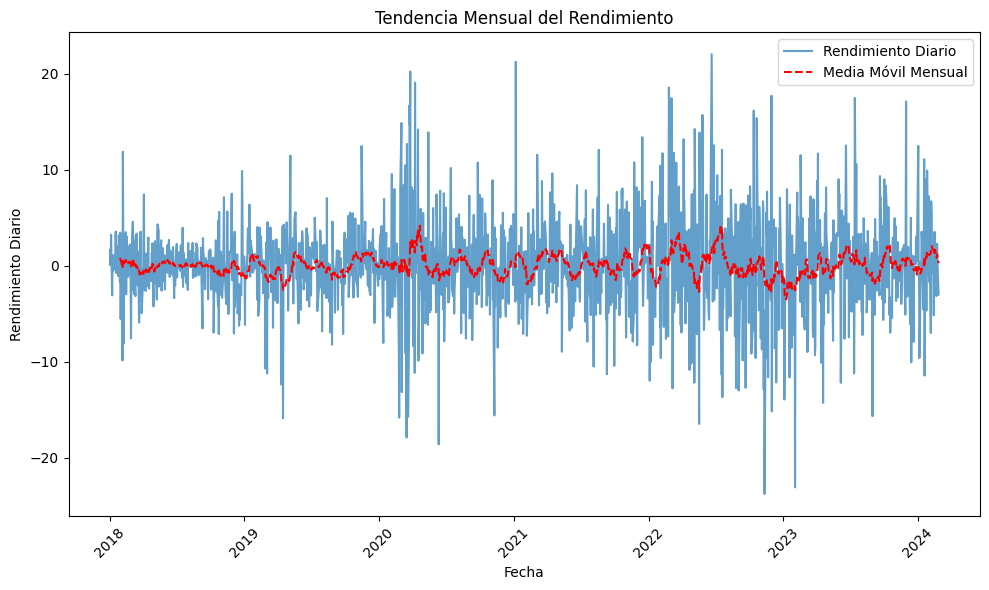

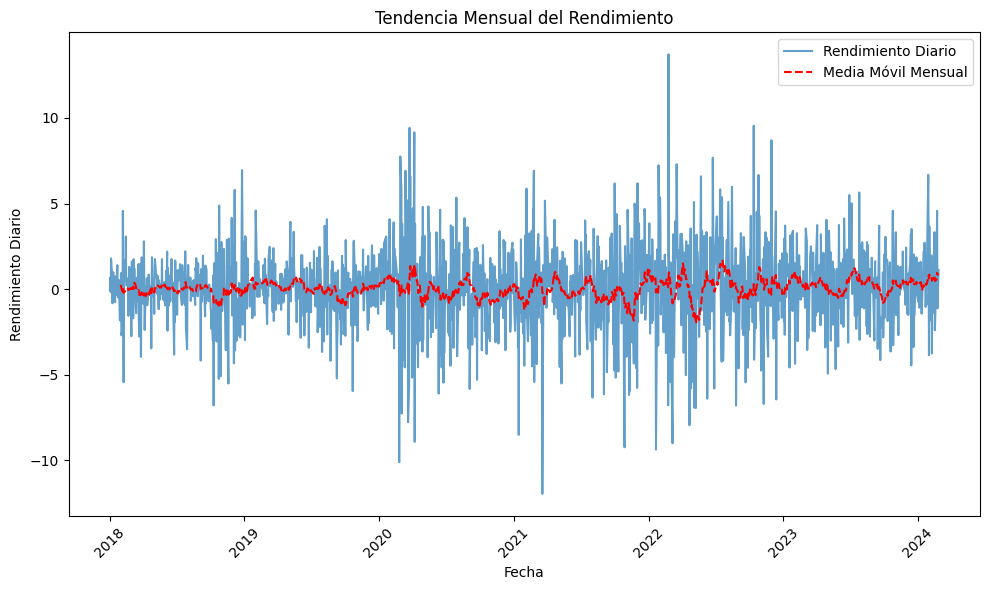

In [25]:
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    plt.figure(figsize=(10, 6))

    # Calcula la media móvil mensual (puedes ajustar la ventana según tus necesidades)
    media_movil = df_accion['Rendimiento_diario'].rolling(window=20).mean()

    plt.plot(df_accion['Date'], df_accion['Rendimiento_diario'], label='Rendimiento Diario', alpha=0.7)
    plt.plot(df_accion['Date'], media_movil, label='Media Móvil Mensual', color='red', linestyle='--')

    plt.title('Tendencia Mensual del Rendimiento')
    plt.xlabel('Fecha')
    plt.ylabel('Rendimiento Diario')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Una de las conclusiones que puedo dar de estos graficos es que el año 2020 tuvo un buen rendimiento mensual comparado con otros años

# Se van a probar modelos los seleccionados son randomforest y regresion lineal para una primer prueba

In [26]:
#Se crea Fecha en formato uniz para ser compatible con los modelos
df['Fecha'] = df['Date'].astype('int64') // 10**9

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelos_por_accion = {}

# Iterar sobre cada acción y entrenar un modelo por acción
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    
    # Preprocesamiento de datos (asegurándonos de que 'Close' sea numérico)
    
    # División de datos en conjunto de entrenamiento y prueba
    X = df_accion[['Fecha']]  # Agrega las características relevantes
    y = df_accion['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)
    
    # Inicialización del modelo de regresión lineal
    modelo_regresion = LinearRegression()
    
    # Entrenamiento del modelo
    modelo_regresion.fit(X_train, y_train)
    
    # Almacenar el modelo en el diccionario
    modelos_por_accion[accion] = modelo_regresion

    # Predicciones en el conjunto de prueba
    y_pred = modelo_regresion.predict(X_test)
    
    resultados = pd.DataFrame({'Fecha': X_test['Fecha'], 'Precio Real': y_test, 'Precio Predicho': y_pred})
    print(f'Resultados para la acción {accion}:')
    print(resultados)
    # Evaluación del rendimiento del modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Resultados para la acción {accion}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared (R2): {r2}')
    print('-------------------------------------')


Resultados para la acción AAPL:
           Fecha  Precio Real  Precio Predicho
30    1518566400    39.677551        28.486049
777   1612310400   131.447784       111.140375
1010  1641340800   172.723587       136.736554
578   1587427200    65.435295        89.200794
527   1580947200    79.106552        83.487361
...          ...          ...              ...
1227  1668470400   149.015839       160.656792
759   1609977600   128.484024       109.083540
1247  1670976000   142.232498       162.865986
374   1561680000    47.817776        66.499421
873   1624320000   131.907211       121.729271

[310 rows x 3 columns]
Resultados para la acción AAPL:
Mean Squared Error: 241.76970591134784
R-squared (R2): 0.9080296431973265
-------------------------------------
Resultados para la acción GOOG:
           Fecha  Precio Real  Precio Predicho
1572  1518566400    53.485001        47.257790
2319  1612310400   103.503502        93.095515
2552  1641340800   137.653503       107.290423
2120  1587427200

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import pandas as pd

modelos_rf_por_accion = {}

# Iterar sobre cada acción y entrenar un modelo Random Forest por acción
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    
    # Obtener características (X) y variable objetivo (y) para la acción actual
    X = df_accion[['Fecha']]  # Agrega las características relevantes
    y = df_accion['Close']
    
    # División de datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Inicialización del modelo de Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
    
    # Entrenamiento del modelo
    modelo_rf.fit(X_train, y_train)
    
    # Almacenar el modelo en el diccionario
    modelos_rf_por_accion[accion] = modelo_rf

    # Predicciones en el conjunto de prueba
    y_pred = modelo_rf.predict(X_test)
    
    resultados = pd.DataFrame({'Fecha': X_test['Fecha'], 'Precio Real': y_test, 'Precio Predicho': y_pred})
    print(f'Resultados para la acción {accion}:')
    print(resultados)

    # Evaluación del rendimiento del modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Resultados para Random Forest en la acción {accion}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared (R2): {r2}')
    print('-------------------------------------')
    

# Ahora puedes comparar los resultados de Random Forest con los resultados de regresión lineal


Resultados para la acción AAPL:
           Fecha  Precio Real  Precio Predicho
30    1518566400    39.677551        44.355177
777   1612310400   131.447784       125.523477
1010  1641340800   172.723587       152.228127
578   1587427200    65.435295        70.206215
527   1580947200    79.106552        70.206215
...          ...          ...              ...
1227  1668470400   149.015839       152.228127
759   1609977600   128.484024       125.523477
1247  1670976000   142.232498       152.228127
374   1561680000    47.817776        46.901243
873   1624320000   131.907211       125.523477

[310 rows x 3 columns]
Resultados para Random Forest en la acción AAPL:
Mean Squared Error: 56.14982497622264
R-squared (R2): 0.9786403370182183
-------------------------------------


Resultados para la acción GOOG:
           Fecha  Precio Real  Precio Predicho
1572  1518566400    53.485001        56.501437
2319  1612310400   103.503502       128.753501
2552  1641340800   137.653503       129.034553
2120  1587427200    60.817001        66.781476
2069  1580947200    73.811501        66.781476
...          ...          ...              ...
2769  1668470400    98.720001       106.623719
2301  1609977600    89.362503        87.823301
2789  1670976000    95.309998       106.623719
1916  1561680000    54.045502        56.649181
2415  1624320000   126.999496       129.034553

[310 rows x 3 columns]
Resultados para Random Forest en la acción GOOG:
Mean Squared Error: 80.69964358497536
R-squared (R2): 0.9230905187628433
-------------------------------------
Resultados para la acción MSFT:
           Fecha  Precio Real  Precio Predicho
3114  1518566400    85.006516        93.309440
3861  1612310400   236.207855       223.068577
4094  1641340800   310.114655       272.228233


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

modelos_rf_por_accion = {}
fecha_futura = datetime(2024, 2, 29)
# Iterar sobre cada acción y entrenar un modelo Random Forest por acción
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    
    # Obtener características (X) y variable objetivo (y) para la acción actual
    X = df_accion[['Fecha']]  # Agrega las características relevantes
    y = df_accion['Close']
    
    # División de datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Inicialización del modelo de Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
    
    # Entrenamiento del modelo
    modelo_rf.fit(X_train, y_train)
    
    # Almacenar el modelo en el diccionario
    modelos_rf_por_accion[accion] = modelo_rf

    # Predicciones en el conjunto de prueba
    y_pred = modelo_rf.predict(X_test)
    
    datos_prediccion = pd.DataFrame({'Fecha': [fecha_futura]})

    # Hacer la predicción utilizando el modelo correspondiente
    modelo_rf = modelos_rf_por_accion[accion]
    prediccion = modelo_rf.predict(datos_prediccion[['Fecha']])

    # Imprimir la predicción para la fecha futura
    print(f'Predicción para la acción {accion} en la fecha {fecha_futura}: {prediccion[0]}')

Predicción para la acción AAPL en la fecha 2024-02-29 00:00:00: 183.65904997682145
Predicción para la acción GOOG en la fecha 2024-02-29 00:00:00: 144.81492997186072
Predicción para la acción MSFT en la fecha 2024-02-29 00:00:00: 386.2148296941283
Predicción para la acción NVDA en la fecha 2024-02-29 00:00:00: 725.5003302616175
Predicción para la acción AMZN en la fecha 2024-02-29 00:00:00: 141.45663913478097
Predicción para la acción NFLX en la fecha 2024-02-29 00:00:00: 450.8953761376121
Predicción para la acción TSLA en la fecha 2024-02-29 00:00:00: 213.3769126392825
Predicción para la acción META en la fecha 2024-02-29 00:00:00: 415.60574730758816
Predicción para la acción AMD en la fecha 2024-02-29 00:00:00: 171.82130870653054
Predicción para la acción XOM en la fecha 2024-02-29 00:00:00: 100.99844255849548
Predicción para la acción UBER en la fecha 2024-02-29 00:00:00: 77.57664371385066
Predicción para la acción QCOM en la fecha 2024-02-29 00:00:00: 144.8979462636794
Predicción p

Se elige el modelo de randomforest para aplicar en la api por tener mejor precision y estar un poco mas cerca de los datos.
Me hubiera utilizar otros modelos de regresion lineal pero cuando se hicieron las pruebas sus resultados no fueron sastifactorios.
Por ultimo en el deploy no se utilizaron los modelos entrenados en archivo picket por que al probarlos perdian precision voy a investigar
la razon para tenerla presente en un fututo